In [1]:
# Import dependencies

import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
# Read crypto csv

file_path = Path("CryptoData/crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


DATA PREPARATION

In [4]:
# View shape of data

crypto_df.shape

(1252, 7)

In [6]:
# View data types

crypto_df.dtypes

CoinAbbreviation     object
CoinName             object
Algorithm            object
IsTrading              bool
ProofType            object
TotalCoinsMined     float64
TotalCoinSupply      object
dtype: object

In [5]:
# Rename first column

crypto_df.columns
crypto_df.columns = ['CoinAbbreviation', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply']
crypto_df.head()

,CoinAbbreviation,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [14]:
# Filter for only crytpos currently trading

trading_crypto_df = crypto_df[crypto_df['IsTrading'] == True]
trading_crypto_df.head()

,CoinAbbreviation,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [15]:
# View shape of only crytpos currently trading

trading_crypto_df.shape

(1144, 7)

In [16]:
# Drop IsTrading column

trading_crypto_df = trading_crypto_df.drop(['IsTrading'], axis=1)

In [18]:
# View data with dropped column

trading_crypto_df.head()

,CoinAbbreviation,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [19]:
# Remove nulls

trading_crypto_df.dropna()

,CoinAbbreviation,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [23]:
# Filter for crypto that has been mined (TotalCoinsMined should be greater than zero)

mined_crypto = trading_crypto_df.loc[trading_crypto_df['TotalCoinsMined']>0]
mined_crypto.head()

,CoinAbbreviation,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [22]:
# View data data with total mined filter

mined_crypto.shape

(532, 6)

In [24]:
# Remove CoinName column as it will not be comprehensible to a machine learning algorithm

mined_crypto = mined_crypto.drop(['CoinName'], axis=1)

In [25]:
# Remove CoinAbbreviation column as it will not be comprehensible to a machine learning algorithm

mined_crypto = mined_crypto.drop(['CoinAbbreviation'], axis=1)

In [26]:
# Convert remaining features with text values (Algorithm & ProofType)

num_crypto = pd.get_dummies(mined_crypto, columns=['Algorithm', 'ProofType'], drop_first=True)

In [27]:
# View numercial crypto data

num_crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# View new columns created when converting data

num_crypto.columns

Index(['TotalCoinsMined', 'TotalCoinSupply', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algorithm_NeoScrypt', 'Algorithm_Ouroboros',
   

In [34]:
# Standardize the dataset

scaler = StandardScaler()
scaled_crypto = scaler.fit_transform(num_crypto)

DIMENTIONALITY REDUCTION

In [35]:
# Initialize the PCA model & preserve 90% of the explained variance

pca = PCA(n_components=.90)

crypto_pca = pca.fit_transform(scaled_crypto)

In [37]:
# Transform PCA data to the crypto data

crypto_pca_df = pd.DataFrame(
    data=crypto_pca)

In [39]:
# View shape of data

crypto_pca_df.shape

(532, 74)

FEATURE CHANGE OBSERVATION

90% of the explained variance was preserved in dimentionality reduction which caused the number of columns in the data to decrease from 96 to 74.

In [43]:
# Run t-SNE on principal components

tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(crypto_pca_df)

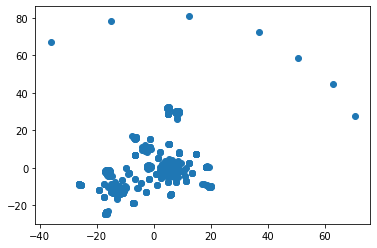

In [44]:
# Plot t-SNE output

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

CLUSTER OBSERVATION

There does appear to be distinct clusters in the scatter plot using the t-SNE output.

CLUSTER ANALYSIS WITH K-MEANS

In [45]:
# Determine the inertia

inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,198744.125000
1,2,112565.484375
2,3,62824.562500
3,4,47295.664062
4,5,36805.605469


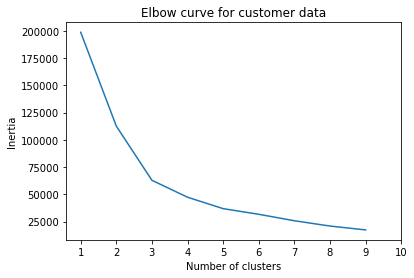

In [46]:
# Plot the elbow curve to determie the most optimal candidate(s) for k

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

RECOMMENDATION

Based upon the findings uncovered while working through this project, cryptocurrencies can be clustered together. 

The number of clusters can be determined by looking at the elbow curve. By observing the elbow curve, it can be determined that cryptocurrencies can be clustered into 4 groups. 